# Set working dir

In [1]:
import os 
import warnings
import platform

warnings.filterwarnings("ignore")
if "macOS" in platform.platform():
    os.chdir("/Users/erjo3868/repos/hypedsearch/hypedsearch")
# Running on Fiji
else:
    os.chdir("/scratch/Shares/layer/hypedsearch/hypedsearch")


# Index protein-product ion DB

In [15]:
%%time
from src.lookups.protein_product_ion_db import load_existing_protein_product_ion_db
import os
db_path = "dbs/Uniprot_mouse.fasta_max_k=30_charges=(1, 2, 3).db"
size_gb = os.path.getsize(db_path) / (1024 ** 3)
print(f"DB size BEFORE indexing = {size_gb}")

db = load_existing_protein_product_ion_db(db_path=db_path)
db.create_index_on_product_ion_mass()

size_gb = os.path.getsize(db_path) / (1024 ** 3)
print(f"DB size AFTER indexing = {size_gb}")

ModuleNotFoundError: No module named 'src.lookups'

# Protein-product ion database

## Time it takes to make and query the database

In [5]:
import random
from time import time

import pandas as pd
from src.constants import MOUSE_PROTEOME, NEUTRAL_MASS, PRODUCT_ION_TABLE, RESULTS_DIR, IonTypes
from src.peptides_and_ions import Peptide
from src.protein_product_ion_database import create_and_populate_protein_and_product_ion_database
from src.utils import pickle_and_compress




peptides = Peptide.from_fasta(fasta_path=MOUSE_PROTEOME)

max_num_mins = 0.2
prev_time_delta = 0
idx = 1
peptide_step = 10
charges, ion_types = [1, 2, 3], [IonTypes.B_ION_TYPE, IonTypes.Y_ION_TYPE]
data = []
num_repeats = 1
while prev_time_delta < 60*max_num_mins:
    num_peptides = idx*peptide_step
    print(f"|peptides| = {num_peptides}; |time delta| = {prev_time_delta}")
    for _ in range(num_repeats):
        # Sample peptides
        peptide_sample = random.sample(peptides, num_peptides)

        # Create and index database
        t0 = time()
        db = create_and_populate_protein_and_product_ion_database(
            charges=charges,
            ion_types=ion_types,
            peptides=peptide_sample,
        )
        db.add_index(table_name=PRODUCT_ION_TABLE, index_name="mass_idx", colms_to_index=[NEUTRAL_MASS])
        prev_time_delta = time() - t0

        # Validation
        assert len(db.get_proteins()) == num_peptides

        # Updates
        data.append([num_peptides, prev_time_delta, len(db.get_product_ions())])
    idx += 1

data = pd.DataFrame(data, columns=["num_peptides", "create_and_index_time_delta", "num_product_ions"])

pickle_and_compress(obj=data, file_path=RESULTS_DIR / f"db_creation_timing_charge={charges}.pkl")
# FOR TESTING
# charges, ion_types = [1, 2, 3], [IonTypes.B_ION_TYPE, IonTypes.Y_ION_TYPE]
# # with caplog.at_level(logging.INFO):
# start_time = time()
# db = create_and_populate_protein_and_product_ion_database(
#     charges=charges,
#     ion_types=ion_types,
#     peptides=peptides,
# )
# db.add_index(table_name=PRODUCT_ION_TABLE, index_name="mass_idx", colms_to_index=[NEUTRAL_MASS])
# time() - start_time

|peptides| = 10; |time delta| = 0
|peptides| = 20; |time delta| = 5.9879701137542725
|peptides| = 30; |time delta| = 10.874977111816406


In [7]:
len(db.get_product_ions())

192750

In [ ]:
fasta_proteins = list(get_proteins_from_fasta(fasta_path=fasta_path))
fasta_proteins = fasta_proteins[:10]

# protein_name = "sp|P99027|RLA2_MOUSE"
# protein = get_specific_protein_from_fasta(fasta_path=fasta_path, protein_name=protein_name)
db = create_protein_product_ion_db(
    db_path=db_path,
    protein_seqs=[protein.sequence for protein in fasta_proteins[:10]],
    charges_to_consider=[1, 2],
    max_kmer_len=30,
)

In [ ]:
df = main(db_path=db_path, sample_size=10, ppm_tolerance=10, output_dir=None)
df

Generating random sample...
Finished generating random sample
Ion 1 of 10
Ion 2 of 10
Ion 3 of 10
Ion 4 of 10
Ion 5 of 10
Ion 6 of 10
Ion 7 of 10
Ion 8 of 10
Ion 9 of 10
Ion 10 of 10


,mass,time,num_matching_ions,len_search_ion,num_matching_ions_by_charge
0,2527.323138,0.823784,24,23,{1: 24}
1,982.411230,0.417797,8,8,"{1: 7, 2: 1}"
2,1631.340411,0.208170,18,28,{2: 18}
3,3724.859914,0.415554,3,30,{1: 3}
4,1719.840417,0.817771,19,15,"{2: 5, 1: 14}"
5,1868.837106,1.221565,10,16,{1: 10}
6,50.541483,0.819681,310,1,{2: 310}
7,3390.959707,0.807122,2,30,{1: 2}
8,487.248152,1.229158,24,8,"{1: 15, 2: 9}"
9,455.738771,0.832291,11,8,{2: 11}


In [ ]:
db_path = "dbs/Uniprot_mouse.fasta_max_k=30_charges=(1, 2, 3).db"
df = main(db_path=db_path, sample_size=10, ppm_tolerance=10, output_dir=None)

Generating random sample...


# How long does it take to query the protein-product ion DB by mass? 

In [ ]:
from src.lookups.protein_product_ion_db import load_existing_protein_product_ion_db

db_path = "dbs/Uniprot_mouse.fasta_max_k=30_charges=(1, 2, 3).db"
db = load_existing_protein_product_ion_db(db_path=db_path)
# query = f"SELECT {MASS} FROM {PRODUCT_ION_TABLE} ORDER BY RANDOM() LIMIT {sample_size};"
# db.run_query(query=query)

In [ ]:
db.get_charges_in_db()

In [ ]:
df = main(db_path=db_path, sample_size=10, ppm_tolerance=10, output_dir=None)

The above was really slow.
Let's try ChatGPT's suggested way

In [ ]:
from Bio import SeqIO
from src.constants import MOUSE_PROTEOME

fasta_proteins = list(get_proteins_from_fasta(fasta_path=MOUSE_PROTEOME))

def get_unique_kmers(fasta_file, k):
    unique_kmers = set()
    
    # Read FASTA sequences one at a time
    for record in SeqIO.parse(fasta_file, "fasta"):
        seq = str(record.seq)
        
        # Generate kmers using a sliding window
        for i in range(len(seq) - k + 1):
            kmer = seq[i:i + k]
            unique_kmers.add(kmer)  # Sets automatically store only unique kmers
    
    return unique_kmers

uniq_kmers = {}
for k in tqdm(np.arange(1, 31)):
    uniq_kmers[k] = get_unique_kmers(fasta_file=MOUSE_PROTEOME, k=k)



100%|██████████| 30/30 [01:21<00:00,  2.71s/it]


In [ ]:
cum_sum = {}
for k, kmers in uniq_kmers.items():
    k, len(kmers)
    break

(1, 24)

# Compare spectrum to DB

In [ ]:



from dataclasses import dataclass
from src.constants import IonTypes
from src.protein_product_ion_database import ProteinProductIonDb, DbProtein

@dataclass
class MinimalProductIon:
    protein_id: int
    charge: int
    neutral_mass: int
    inclusive_start: int

DbProtein(id=0, seq="ACDE")

DbProtein
min_k, max_k = 2, 2
charges = [1]
ion_types = [IonTypes.B_ION_TYPE]
db = ProteinProductIonDb(
    min_k=min_k,
    max_k=max_k,
    charges=charges,
    ion_types=ion_types,
)

x = DbProtein(id=0, seq="ACDE")
x.make_table_query(db=db)

DbProtein(id=0, seq='ACDE')

src.protein_product_ion_database.DbProtein

AttributeError: 'DbProtein' object has no attribute 'make_table_query'

# Number of total k-mers vs unique k-mers in mouse proteome

In [ ]:
from tqdm import tqdm
from src.peptides_and_ions import Peptide, get_unique_kmers
from src.constants import MOUSE_PROTEOME
import pandas as pd

peptides = Peptide.from_fasta(fasta_path=MOUSE_PROTEOME)

k_vals = list(range(1, 26))
rows = []
for k in tqdm(k_vals):
    num_total_kmers = sum([
        (len(peptide.seq) - k +  1) 
        for peptide in peptides
    ])
    num_uniq_kmers = len(get_unique_kmers(peptides=peptides, k=k))
    rows.append([k, num_total_kmers, num_uniq_kmers])
    df = pd.DataFrame(rows, columns=["k", "total_kmers", "uniq_kmers"])

100%|██████████| 25/25 [11:24<00:00, 27.37s/it]


In [ ]:
from src.plot_utils import fig_setup, finalize, set_

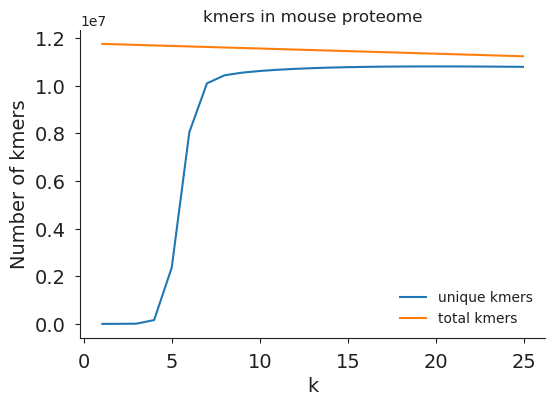

In [ ]:
from src.plot_utils import fig_setup, finalize, set_title_axes_labels

_, axs = fig_setup()
ax = axs[0]

ax.plot(df["k"], df["uniq_kmers"], label="unique kmers")
ax.plot(df["k"], df["total_kmers"], label="total kmers")
set_title_axes_labels(ax=ax, xlabel="k", ylabel="Number of kmers", title="kmers in mouse proteome")
finalize(axs)



# Proteins in mouse proteome vs Comet run 1

In [ ]:
from src.comet_utils import load_comet_data, CometRow
from src.peptides_and_ions import get_proteins_from_fasta
from src.utils import flatten_list_of_lists

comet_df = load_comet_data()
# comet_df.head(2)
comet_rows = CometRow.from_dataframe(comet_df)
all_comet_proteins = flatten_list_of_lists([row.proteins for row in comet_rows])
uniq_comet_proteins = set(all_comet_proteins)
fasta_proteins = get_proteins_from_fasta(fasta_path=MOUSE_PROTEOME)


Reading data for BMEM_AspN_Fxn4
Reading data for BMEM_AspN_Fxn5
Reading data for BMEM_AspN_Fxn6
Reading data for BMEM_AspN_Fxn7
Reading data for BMEM_AspN_Fxn8
Reading data for BMEM_AspN_Fxn9


Number of unique Comet proteins = 16174
Minimum Comet protein abundance = 1, max = 971
Number of proteins in mouse proteome = 21759


,x,number_proteins_gt_x-1_le_x
0,1,4369
1,2,3040


(0.0, 50.0)

,x,number_proteins_gt_x
0,0,16174
1,1,11805


(10.0, 50.0)

(-1.0, 1000.0)

Text(0.5, 0.98, 'Comet run 1 data')

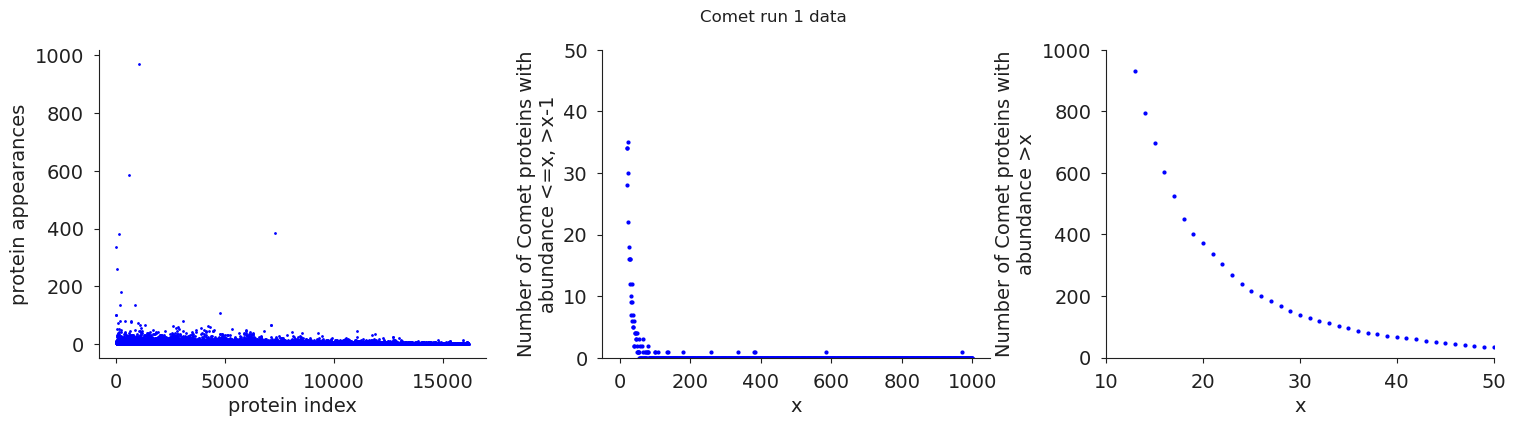

In [ ]:
from typing import Counter
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

print(f"Number of unique Comet proteins = {len(uniq_comet_proteins)}")
assert len(fasta_proteins) == len(set([protein.name for protein in fasta_proteins])), "Why aren't the number of proteins in the fasta the same as the number of unique proteins?"
comet_protein_abundances = np.array(list(Counter(all_comet_proteins).values()))
print(f"Minimum Comet protein abundance = {min(comet_protein_abundances)}, max = {max(comet_protein_abundances)}")
print(f"Number of proteins in mouse proteome = {len(fasta_proteins)}")

_, axs = fig_setup(1, 3)
ax = axs[0]
_=ax.plot(
    comet_protein_abundances,
    "bo",
    ms=1,
)
set_title_axes_labels(
    ax=ax, 
    xlabel="protein index", 
    ylabel="protein appearances",
    # title="Number of times protein appears in Comet run 1 data"
)
finalize(axs)

precursor_charges = []
prev_val = 0
for val in range(1, 1001):
    precursor_charges.append([val, sum((comet_protein_abundances>prev_val) & (comet_protein_abundances<=val))])
    # data.append([val, sum((comet_protein_abundances<=val))])
    prev_val = val
colm1, colm2 = "x", "number_proteins_gt_x-1_le_x"
precursor_charges = pd.DataFrame(precursor_charges, columns=[colm1, colm2])
precursor_charges.head(2)

# _, axs = fig_setup()
ax = axs[1]
_=ax.plot(
    precursor_charges[colm1], precursor_charges[colm2],
    "bo",
    ms=2
)
set_title_axes_labels(
    ax=ax, 
    xlabel="x", 
    ylabel="Number of Comet proteins with\nabundance <=x, >x-1",
    # title="Number of times protein appears in Comet run 1 data"
)
ax.set_ylim(0, 50)
finalize(axs)

precursor_charges = []
for val in range(0, 1001):
    precursor_charges.append([val, sum((comet_protein_abundances>val))])
colm1, colm2 = "x", "number_proteins_gt_x"
precursor_charges = pd.DataFrame(precursor_charges, columns=[colm1, colm2])
precursor_charges.head(2)

# _, axs = fig_setup()
ax = axs[2]
_=ax.plot(
    precursor_charges[colm1], precursor_charges[colm2],
    "bo",
    ms=2
)
set_title_axes_labels(
    ax=ax, 
    xlabel="x", 
    ylabel="Number of Comet proteins with\nabundance >x",
    # title="Number of times protein appears in Comet run 1 data"
)
plt.xlim(left=10, right=50)
plt.ylim(top=1000, bottom=-1)
plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.suptitle("Comet run 1 data")
finalize(axs)


# Analyze Comet PSMs

In [3]:
from src.comet_utils import CometRow, load_comet_data
from src.constants import IONS_MATCHED, PLAIN_PEPTIDE, PROTEIN, PROTEIN_COUNT, SAMPLE, SCAN
comet_df = load_comet_data()
comet_df.head(2)
comet_rows = CometRow.from_dataframe(comet_df)


Reading data for BMEM_AspN_Fxn4
Reading data for BMEM_AspN_Fxn5
Reading data for BMEM_AspN_Fxn6
Reading data for BMEM_AspN_Fxn7
Reading data for BMEM_AspN_Fxn8
Reading data for BMEM_AspN_Fxn9


,scan,num,charge,exp_neutral_mass,calc_neutral_mass,e-value,xcorr,delta_cn,sp_score,ions_matched,...,plain_peptide,modified_peptide,prev_aa,next_aa,protein,protein_count,modifications,retention_time_sec,sp_rank,sample
0,7,1,3,1525.774133,1525.773636,0.000202,2.187,0.4294,229.0,15,...,SAAPAAGSAPAAAEEKK,G.SAAPAAGSAPAAAEEKK.D,G,D,"tr|A0A5F8MPY2|A0A5F8MPY2_MOUSE,sp|P99027|RLA2_...",2,-,714.0,1,BMEM_AspN_Fxn4
1,7,2,3,1525.774133,1525.773636,2.030000,1.248,0.0200,26.0,6,...,AAQTPGSGEAVLSKNP,T.AAQTPGSGEAVLSKNP.N,T,N,sp|Q8BI84|TGO1_MOUSE,1,-,714.0,16,BMEM_AspN_Fxn4


In [10]:

from src.constants import PLAIN_PEPTIDE, RESULTS_DIR, IonTypes
from src.peptide_spectrum_comparison import PeptideSpectrumComparison, compare_peptide_to_spectrum
from src.peptides_and_ions import Peptide
from src.comet_utils import CometRow
from src.utils import decompress_and_unpickle, pickle_and_compress
from dataclasses import dataclass
from tqdm import tqdm

testing = True
peak_filtering = True
top_n_peaks = 50
ppm_tolerance = 10
ion_types = [IonTypes.B_ION_TYPE, IonTypes.Y_ION_TYPE]

@dataclass
class PSM:
    comet_row: CometRow
    psm: PeptideSpectrumComparison

psms = []
for row_num, row in tqdm(enumerate(comet_rows)):
# for row_num, row in df.iterrows():
    peptide = Peptide(seq=row.proposed_peptide)
    spectrum = row.get_corresponding_spectrum()

    # Peak filtering
    if peak_filtering:
        spectrum.filter_to_top_n_peaks(n=top_n_peaks)
        assert spectrum.peaks_preprocessed

    comparison = compare_peptide_to_spectrum(
        peptide=peptide, 
        spectrum=spectrum, 
        ppm_tolerance=ppm_tolerance,
        ion_types=ion_types
    )
    psms.append(
        PSM(
        comet_row=row,
        psm=comparison)
    )
    if testing:
        if row_num >= 2:
            break

if testing:
    path = RESULTS_DIR / f"TESTING_comet_run_1_psms_ppmTol={ppm_tolerance}_peakFiltering={peak_filtering}_topN={top_n_peaks}.pkl"
else:
    path = RESULTS_DIR / f"comet_run_1_psms_ppmTol={ppm_tolerance}_peakFiltering={peak_filtering}_topN={top_n_peaks}.pkl"
pickle_and_compress(obj=psms, file_path=path)
# decompress_and_unpickle(file_path=path)

2it [00:09,  4.91s/it]


In [5]:
decompress_and_unpickle(file_path=path)

[PSM(comet_row=CometRow(sample='BMEM_AspN_Fxn4', scan=7, ions_matched=15, proteins=['tr|A0A5F8MPY2|A0A5F8MPY2_MOUSE', 'sp|P99027|RLA2_MOUSE'], protein_count=2, proposed_peptide='SAAPAAGSAPAAAEEKK'), psm=PeptideSpectrumComparison(num_peaks=50, num_peaks_with_a_product_ion_match=12, num_product_ions=34, num_product_ions_with_match=10, num_peaks_matching_product_ion={('S', 'b'): 0, ('SA', 'b'): 1, ('SAA', 'b'): 1, ('SAAP', 'b'): 0, ('SAAPA', 'b'): 0, ('SAAPAA', 'b'): 0, ('SAAPAAG', 'b'): 0, ('SAAPAAGS', 'b'): 0, ('SAAPAAGSA', 'b'): 0, ('SAAPAAGSAP', 'b'): 0, ('SAAPAAGSAPA', 'b'): 0, ('SAAPAAGSAPAA', 'b'): 0, ('SAAPAAGSAPAAA', 'b'): 0, ('SAAPAAGSAPAAAE', 'b'): 0, ('SAAPAAGSAPAAAEE', 'b'): 0, ('SAAPAAGSAPAAAEEK', 'b'): 0, ('SAAPAAGSAPAAAEEKK', 'b'): 0, ('SAAPAAGSAPAAAEEKK', 'y'): 1, ('AAPAAGSAPAAAEEKK', 'y'): 1, ('APAAGSAPAAAEEKK', 'y'): 2, ('PAAGSAPAAAEEKK', 'y'): 2, ('AAGSAPAAAEEKK', 'y'): 1, ('AGSAPAAAEEKK', 'y'): 1, ('GSAPAAAEEKK', 'y'): 0, ('SAPAAAEEKK', 'y'): 0, ('APAAAEEKK', 'y'): 1,

# Comet EDA

In [45]:
comet_df = load_comet_data()
comet_df.head(2)
comet_df.shape

list(comet_df.groupby(["scan", "sample"]))[0][1].shape
len(list(comet_df.groupby(["scan", "sample"])))
# for name, group in comet_df.groupby(["scan", "sample"]):

#     name, group
#     break

,scan,num,charge,exp_neutral_mass,calc_neutral_mass,e-value,xcorr,delta_cn,sp_score,ions_matched,...,plain_peptide,modified_peptide,prev_aa,next_aa,protein,protein_count,modifications,retention_time_sec,sp_rank,sample
0,7,1,3,1525.774133,1525.773636,0.000202,2.187,0.4294,229.0,15,...,SAAPAAGSAPAAAEEKK,G.SAAPAAGSAPAAAEEKK.D,G,D,"tr|A0A5F8MPY2|A0A5F8MPY2_MOUSE,sp|P99027|RLA2_...",2,-,714.0,1,BMEM_AspN_Fxn4
1,7,2,3,1525.774133,1525.773636,2.030000,1.248,0.0200,26.0,6,...,AAQTPGSGEAVLSKNP,T.AAQTPGSGEAVLSKNP.N,T,N,sp|Q8BI84|TGO1_MOUSE,1,-,714.0,16,BMEM_AspN_Fxn4


(62323, 21)

(2, 21)

12566

,scan,num,charge,exp_neutral_mass,calc_neutral_mass,e-value,xcorr,delta_cn,sp_score,ions_matched,...,plain_peptide,modified_peptide,prev_aa,next_aa,protein,protein_count,modifications,retention_time_sec,sp_rank,sample
0,7,1,3,1525.774133,1525.773636,0.000202,2.187,0.4294,229.0,15,...,SAAPAAGSAPAAAEEKK,G.SAAPAAGSAPAAAEEKK.D,G,D,"tr|A0A5F8MPY2|A0A5F8MPY2_MOUSE,sp|P99027|RLA2_...",2,-,714.0,1,BMEM_AspN_Fxn4
1,7,2,3,1525.774133,1525.773636,2.030000,1.248,0.0200,26.0,6,...,AAQTPGSGEAVLSKNP,T.AAQTPGSGEAVLSKNP.N,T,N,sp|Q8BI84|TGO1_MOUSE,1,-,714.0,16,BMEM_AspN_Fxn4


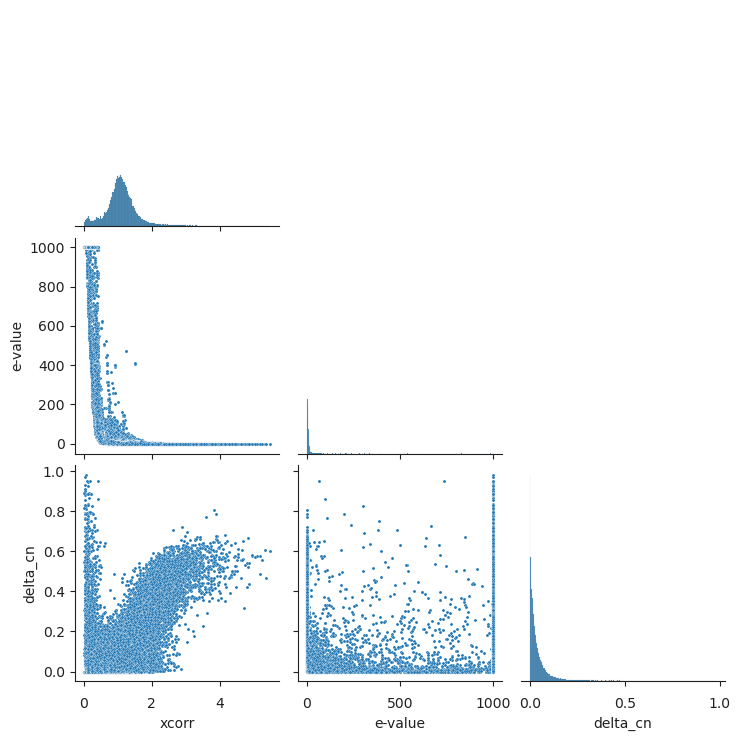

In [ ]:
colms_to_plot = ["xcorr", "e-value", "delta_cn"]
sns.pairplot(
    comet_df[colms_to_plot],
    corner=True, 
    plot_kws={'s': 5}
)


# MZML EDA

In [11]:
from src.mass_spectra import load_mzml_data

spectra = load_mzml_data()

Reading sample BMEM_AspN_Fxn4's MZML
Reading sample BMEM_AspN_Fxn5's MZML
Reading sample BMEM_AspN_Fxn6's MZML
Reading sample BMEM_AspN_Fxn7's MZML
Reading sample BMEM_AspN_Fxn8's MZML
Reading sample BMEM_AspN_Fxn9's MZML


## Precursor charge distribution

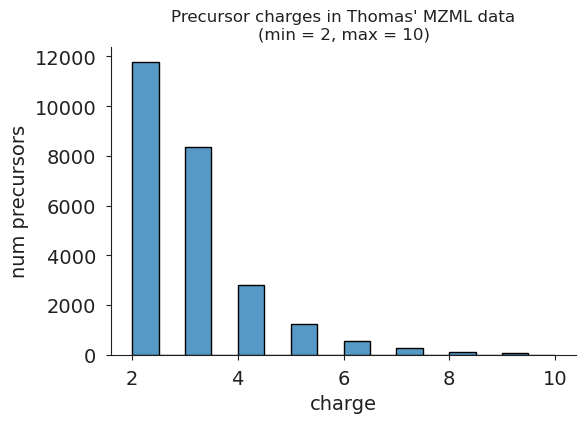

In [32]:
from src.plot_utils import fig_setup, finalize, set_title_axes_labels
import seaborn as sns
import numpy as np

precursor_charges = [spectrum.precursor_charge for spectrum in spectra]

_, axs = fig_setup()
ax = axs[0]
_=sns.histplot(
    precursor_charges,
    ax=ax,
    binwidth=0.5,
    # bins=bins,
    # kde=True,
)
set_title_axes_labels(
    ax=ax,
    xlabel="charge",
    #  "" / (total_num_peaks)",
    ylabel="num precursors", 
    title=(
        "Precursor charges in Thomas' MZML data\n"
        f"(min = {min(precursor_charges)}, max = {max(precursor_charges)})"
    )
)
finalize(axs)
# ax.legend(loc="upper right", bbox_to_anchor=(1.5, 0.9))
# plt.tight_layout()


# Thomas validated proteins

In [47]:
from src.constants import COMET_RUN_1_DIR, GIT_REPO_DIR, SPECTRA_DIR
from src.utils import flatten_list_of_lists
from dataclasses import dataclass
from pathlib import Path
import pandas as pd
from typing import Optional


@dataclass
class SampleFiles:
    validated_proteins: Optional[Path] = None
    mzml: Optional[Path] = None
    comet_run_1: Optional[Path] = None
    comet_run_2: Optional[Path] = None

def get_sample_files(sample_num: int):
    recognized_samples = list(range(4, 10))
    assert sample_num in recognized_samples
    
    comet_run_1 = COMET_RUN_1_DIR / f"BMEM_AspN_Fxn{sample_num}/BMEM_AspN_Fxn{sample_num}.txt"
    validated = SPECTRA_DIR / f"rehybridpeptidelist/Specmill_Validated_Proteins_Fxn0{sample_num}.txt"
    mzml = SPECTRA_DIR / f"BMEM_AspN_Fxn{sample_num}.mzML"
    return SampleFiles(
        validated_proteins=validated,
        comet_run_1=comet_run_1,
        mzml=mzml,
    )

def get_protein_name_from_validated_proteins_row(row: pd.Series) -> str:
    recognized_db_names = {
        "SwissProt": "sp"
    }
    database = row["database"]
    accession = row["accession_number"]
    
    return f"{recognized_db_names[database]}|{accession}"

def read_validated_proteins_txt(file_path: str, sample_num: int) -> pd.DataFrame:
    validated_proteins = pd.read_csv(file_path, sep="\t")

    # Remove "enzyme" column which seems empty so it's being read incorrectly
    if sample_num != 8:
        enzyme_idx = list(validated_proteins.columns).index("enzyme")
        columns = list(validated_proteins.columns)
        _ = columns.pop(enzyme_idx)
        validated_proteins = pd.DataFrame(data=validated_proteins.iloc[:,:-1].to_numpy(), columns=columns)

    return validated_proteins

AN = "accession_number"
ANS = f"{AN}s"
P = "protein"


for sample_num in np.arange(4, 10):
# for sample_num in [8]:
    files = get_sample_files(sample_num=sample_num)

    validated_proteins = read_validated_proteins_txt(
        file_path=files.validated_proteins, sample_num=sample_num
    )
    # Check out rows where "accession_number" != "accession_numbers"
    tmp = validated_proteins[validated_proteins[AN] != validated_proteins[ANS]]
    # tmp[[AN, ANS]]

    # Get unique validated proteins
    validated_proteins[P] = validated_proteins.apply(lambda row: get_protein_name_from_validated_proteins_row(row), axis=1)
    uniq_valid_proteins = set(validated_proteins[P])
    # validated_proteins[P].head()

    # Get Comet run 1 data
    comet_results = CometRow.from_txt(file_path=files.comet_run_1)
    comet_proteins = flatten_list_of_lists(
        [result.proteins for result in comet_results]
    )
    comet_proteins = set(["|".join(protein.split("|")[:2]) for protein in comet_proteins])

    # Compare the two sets
    shared = uniq_valid_proteins.intersection(comet_proteins)
    missing = uniq_valid_proteins - comet_proteins

    print(
        f"For sample {sample_num},\n"
        f"\t num validated proteins = {len(uniq_valid_proteins)}\n"
        f"\t num validated proteins IN Comet run 1 = {len(shared)}\n"
        f"\t num validated proteins NOT IN Comet run 1 = {len(missing)}"
    )

    # break

For sample 4,
	 num validated proteins = 48
	 num validated proteins IN Comet run 1 = 32
	 num validated proteins NOT IN Comet run 1 = 16
For sample 5,
	 num validated proteins = 48
	 num validated proteins IN Comet run 1 = 41
	 num validated proteins NOT IN Comet run 1 = 7
For sample 6,
	 num validated proteins = 73
	 num validated proteins IN Comet run 1 = 64
	 num validated proteins NOT IN Comet run 1 = 9
For sample 7,
	 num validated proteins = 81
	 num validated proteins IN Comet run 1 = 77
	 num validated proteins NOT IN Comet run 1 = 4
For sample 8,
	 num validated proteins = 57
	 num validated proteins IN Comet run 1 = 54
	 num validated proteins NOT IN Comet run 1 = 3
For sample 9,
	 num validated proteins = 22
	 num validated proteins IN Comet run 1 = 17
	 num validated proteins NOT IN Comet run 1 = 5
